# Network Metrics and Connectivity

## Import required libraries

In [5]:
import networkx as nx
import os
import sys

In [6]:
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from graphutil.print import print_network_information

## Shortest Path & Path checking

Checking whether a path between two nodes exist

Has path from B to F: True
Has path from A to H: False
Shortest path from B to F: ['B', 'E', 'C', 'F']


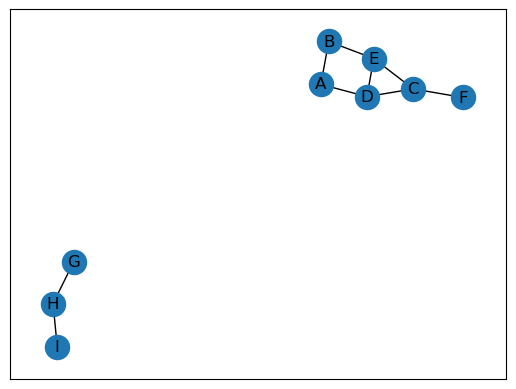

In [10]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
G.add_edges_from([('A','B'), ('A', 'D'), ('D', 'E'), ('C','D'), ('E', 'B'), ('C', 'E'), ('C', 'F'), ('G', 'H'), ('H', 'I')])
nx.draw_networkx(G)
print(f"Has path from B to F: {nx.has_path(G, 'B', 'F')}")
print(f"Has path from A to H: {nx.has_path(G, 'A', 'H')}")
print(f"Shortest path from B to F: {nx.shortest_path(G, 'B', 'F')}")

## Density
Number of edges divided by the total number of possible edges

In [12]:
print(f"Density: {nx.density(G)}")

Density: 0.25


## Cluster Coefficient

Information for given Graph with name '':
	Graph is directed: False
	Number of nodes: 6
	Number of edges: 7


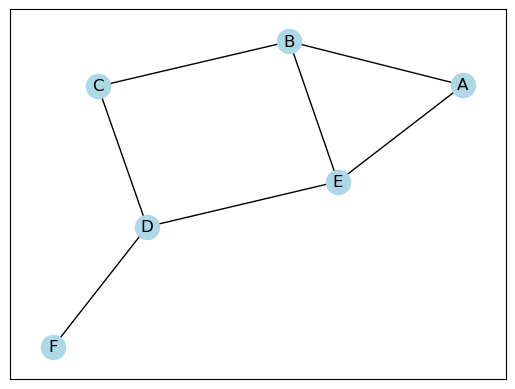

In [14]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('A', 'E'), 
                  ('B', 'C'), ('B', 'E'), 
                  ('C', 'D'), 
                  ('D', 'E'), ('D', 'F')])

pos = nx.drawing.layout.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, node_color="lightblue")

print_network_information(G)

In [15]:
print("Clustering Coefficients of all nodes:")
nx.clustering(G)

Clustering Coefficients of all nodes:


{'A': 1.0,
 'B': 0.3333333333333333,
 'C': 0,
 'D': 0,
 'E': 0.3333333333333333,
 'F': 0}

In [16]:
print(f"Network average cluster coefficient: {nx.average_clustering(G)}")

Network average cluster coefficient: 0.27777777777777773


## Node Connectivity

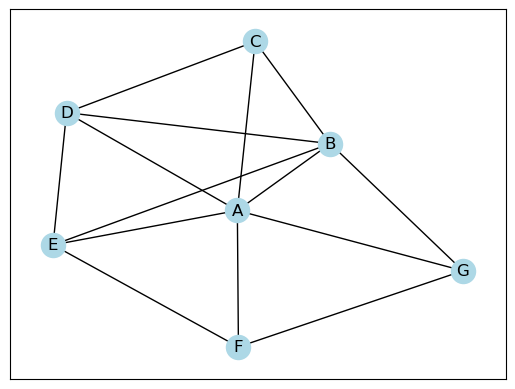

In [18]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
G.add_edges_from([('A', 'B'), ('A', 'E'), ('A', 'D'), ('A', 'C'), 
                  ('B', 'C'), ('B', 'E'), ('B', 'D'), 
                  ('C', 'D'), 
                  ('D', 'E'),
                 ('A', 'F'), ('E', 'F'),
                  ('A', 'G'), ('B', 'G'), ('F', 'G')
                 ])

pos = nx.drawing.layout.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, node_color="lightblue")

Find out which nodes have to be removed in order to disconnect the graph. (returns a generater with all node cut sets)

In [20]:
list(nx.all_node_cuts(G))

[{'A', 'B', 'D'}, {'A', 'E', 'G'}, {'A', 'B', 'E'}, {'A', 'B', 'F'}]

The sample graph has an edge connectivity of three which means that we can remove one random edge and the graph will still be connected.

In [22]:
nx.is_k_edge_connected(G, 3)

True

But the graph can be disconnected when removing three edges (C, A), (C, D) and C, B). Therefore it's not 4-edge-connected:

In [24]:
nx.is_k_edge_connected(G, 4)

False